# Problem Statement: Airbnb Hotel Booking Analysis

The hospitality industry has undergone a significant transformation with the rise of online platforms facilitating lodging and travel bookings. Airbnb, a pioneering American company that has reshaped travel accommodations, provides its services through its online platform. Headquartered in San Francisco, California, Airbnb provides a diverse range of lodging options, including unique stays and experiences, by connecting guests with individual hospitality providers. Airbnb operates on a commission-based model, facilitating transactions between hosts and guests while listing the properties listed on its platform.

This research project utilizes New York City Airbnb dataset to extract meaningful insights. Through data-driven exploration and analysis, the study aims to illuminate the dynamics of the city's lodging market. By understanding factors influencing booking trends, pricing strategies, and overall customer satisfaction, the research contributes to a deeper understanding of Airbnb's operational landscape in one of the most complex urban environments. These insights hold significance for stakeholders and enthusiasts seeking to comprehend the evolving landscape of urban accommodation.

# QUESTIONS

This project is aimed to uncover some insights from the Airbnb Open Data. The following questions would be answered from the data:

What are the different property types in the dataset?

Which neighborhood group has the highest number of listings?

Which neighborhood(s) have the highest average prices for Airbnb listings?

Is there a relationship between the construction year of property and price?

Who are the top 10 hosts by calculated host listing count?

Are hosts with verified identities more likely to receive positive reviews?

Is there a correlation between the price of a listing and its service fee?

What is the average review rate time (e.g., stars) for listings, and does it vary based on the neighborhood group and room type?

Are hosts with a higher calculated host listings count more likely to maintain a higher evaluation by the number of reviews?

# DATA WRANGLING
Data wrangling, a crucial phase in the data analysis process, involves preparing and cleaning raw data to make it suitable for analysis. This involves various tasks such as handling missing values, removing duplicates, and transforming data into a consistent format. Effective data wrangling ensures that the data is reliable and ready for exploration, enabling meaningful insights to be derived from it.

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [49]:
# Read the Airbnb
df = pd.read_excel('/content/1730285881-Airbnb_Open_Data (1).xlsx')

In [50]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [52]:
df.duplicated().value_counts()

,count
False,102058
True,541


In [53]:
# neighbourhood group was "brookln" instead of "Brooklyn"
df[df["neighbourhood group"] == "brookln"]

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,116.0,4.0,167.0,2019-06-24,1.34,4.0,3.0,47.0,NaN,NaN


Problems Identified within the Data

541 duplicated records were found in the data.

Insufficient information was recorded for the house_rules and licence columns.

Dollar signs and commas were recorded along with the values for price and service fee.

The price and service fee were not added to the column titles.

Missing values exist in some records.

Columns like price, service fee, id, host id, last review, and consultation year are assigned incorrect data types.

In the neighbourhood_group column, the spelling of “Brooklyn” was misspelled in some records.

Some objects were identified in the availability_365 column.

CLEAN THE DATA Steps to be Taken for Data Cleaning

Drop all duplicated records.

Remove house_rules and license columns with insufficient data.

Remove all dollar signs in the price and service fee columns.

Remove all commas from the price and service fee columns.

Convert the price and service fee columns to include a $ sign.

Drop all records with missing values.

Convert all mismatched data types to the appropriate ones.

Correct the spelling of 'brookln' to 'Brooklyn'.

Get rid of outliers in the availability_365 column data.

In [54]:
# Drop house_rules and license if they exist
df.drop(['house_rules', 'license'], axis=1, inplace=True, errors='ignore')

# Remove $ and , from price and service fee columns (if they exist)
for col in ['price', 'service fee']:
    if col in df.columns:
        df[col] = df[col].astype(str).str.replace(r'[$,]', '', regex=True)

# Rename price and service fee columns (if they exist)
df.rename(columns={
    'price': 'price_$',
    'service fee': 'service_fee_$'
}, inplace=True)

# Drop rows with missing values
df.dropna(inplace=True)

# Fix data types safely
if 'price_$' in df.columns:
    df['price_$'] = pd.to_numeric(df['price_$'], errors='coerce')

if 'service_fee_$' in df.columns:
    df['service_fee_$'] = pd.to_numeric(df['service_fee_$'], errors='coerce')

if 'id' in df.columns:
    df['id'] = df['id'].astype(str)

if 'host id' in df.columns:
    df['host id'] = df['host id'].astype(str)

if 'last review' in df.columns:
    df['last review'] = pd.to_datetime(df['last review'], errors='coerce')

if 'construction year' in df.columns:
    df['construction year'] = pd.to_numeric(df['construction year'], errors='coerce').astype('Int64')

# Correct spelling of 'brooklin' → 'Brooklyn'
if 'neighbourhood group' in df.columns:
    df.loc[df['neighbourhood group'].str.lower() == 'brooklin', 'neighbourhood group'] = 'Brooklyn'

# Remove outliers in availability_365 (values > 365 don’t make sense)
if 'availability 365' in df.columns:
    df = df[df['availability 365'] <= 365]

# Reset index after cleaning
df.reset_index(drop=True, inplace=True)

In [55]:
df.duplicated().value_counts()

,count
False,81635
True,443


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82078 entries, 0 to 82077
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              82078 non-null  object        
 1   NAME                            82078 non-null  object        
 2   host id                         82078 non-null  object        
 3   host_identity_verified          82078 non-null  object        
 4   host name                       82078 non-null  object        
 5   neighbourhood group             82078 non-null  object        
 6   neighbourhood                   82078 non-null  object        
 7   lat                             82078 non-null  float64       
 8   long                            82078 non-null  float64       
 9   country                         82078 non-null  object        
 10  country code                    82078 non-null  object        
 11  in

In [57]:
df.describe()

,lat,long,instant_bookable,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,82078.000000,82078.000000,82078.000000,82078.000000,81886.000000,81856.000000,82078.000000,82078.000000,82078,82078.000000,82078.000000,82078.000000,82078.000000
mean,40.727255,-73.948247,0.497332,2012.490838,626.675427,125.302104,7.461598,31.921319,2019-06-23 02:35:33.911645184,1.387735,3.287215,7.122116,135.083299
min,40.504560,-74.249840,0.000000,2003.000000,50.000000,10.000000,-365.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.687632,-73.982060,0.000000,2008.000000,341.000000,68.000000,2.000000,3.000000,2018-11-05 00:00:00,0.230000,2.000000,1.000000,5.000000
50%,40.721265,-73.953580,0.000000,2012.000000,626.000000,125.000000,3.000000,11.000000,2019-06-15 00:00:00,0.760000,3.000000,1.000000,93.000000
75%,40.762480,-73.930453,1.000000,2017.000000,915.000000,183.000000,5.000000,38.000000,2019-07-06 00:00:00,2.020000,4.000000,2.000000,253.000000
max,40.916970,-73.705220,1.000000,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2022-05-21 00:00:00,90.000000,5.000000,332.000000,365.000000
std,0.056390,0.050649,0.499996,5.760149,331.793395,66.355800,28.325221,51.533800,NaN,1.758180,1.278210,29.820045,128.487502


In [58]:
#What are the different property types in the Dataset?
property_types = df['room type'].value_counts().to_frame()
property_types

,count
room type,
Entire home/apt,43346
Private room,36984
Shared room,1637
Hotel room,111


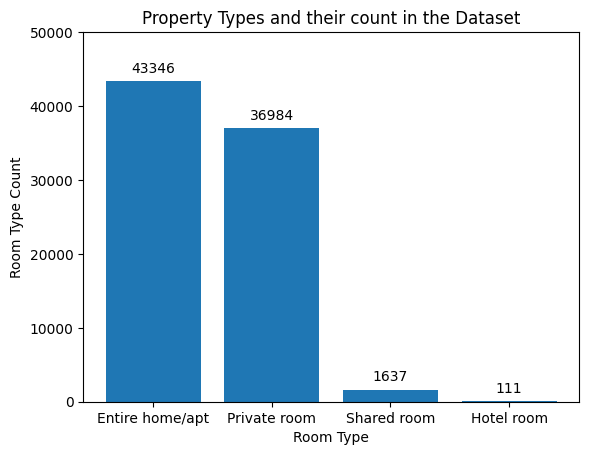

In [59]:
#Room type count plotted on a barchart
room_type_bar = plt.bar(property_types.index, property_types.loc[:,"count"]);
plt.bar_label(room_type_bar, labels = property_types.loc[:,"count"], padding = 4);
plt.ylim([0,50000]);
plt.xlabel('Room Type');
plt.ylabel('Room Type Count');
plt.title('Property Types and their count in the Dataset');

In [60]:
hood_group = df['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Brooklyn,34043
Manhattan,33887
Queens,11064
Bronx,2267
Staten Island,816
brookln,1


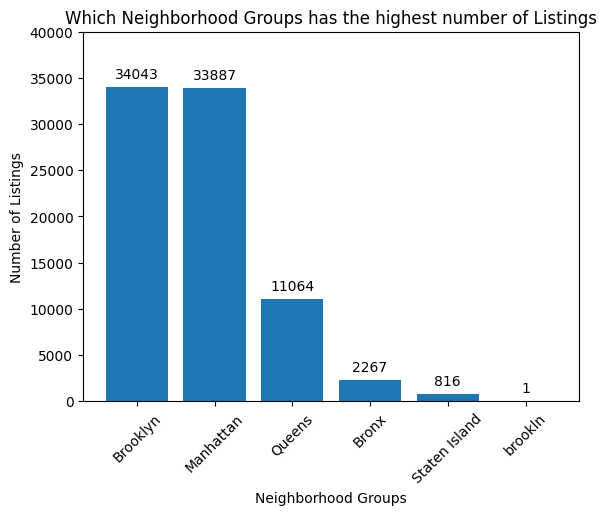

In [61]:
#Which neighborhood group has the highest number of listings?
hood_group_bar = plt.bar(hood_group.index, hood_group.loc[:,"count"]);
plt.bar_label(hood_group_bar, labels = hood_group.loc[:,"count"], padding = 4);
plt.ylim([0,40000]);
plt.xlabel('Neighborhood Groups');
plt.ylabel('Number of Listings');
plt.xticks(rotation = 45);
plt.title('Which Neighborhood Groups has the highest number of Listings');

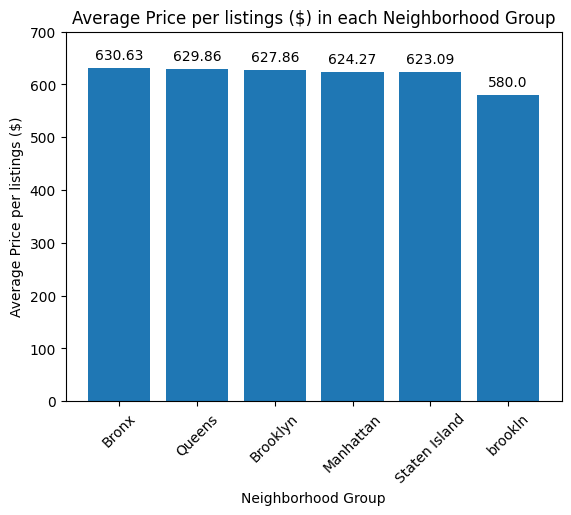

In [62]:
#Which neighborhoods group have the highest average prices for Airbnb listings?
avg_price = df.groupby('neighbourhood group')['price_$'].mean().sort_values(ascending = False).to_frame()
avg_price_bar = plt.bar(avg_price.index, avg_price.loc[:,'price_$']);
plt.bar_label(avg_price_bar, labels = round(avg_price.loc[:,'price_$'], 2), label_type = 'edge', padding = 4);
plt.ylim([0,700]);
plt.xlabel('Neighborhood Group');
plt.ylabel('Average Price per listings ($)');
plt.xticks(rotation = 45);
plt.title('Average Price per listings ($) in each Neighborhood Group');

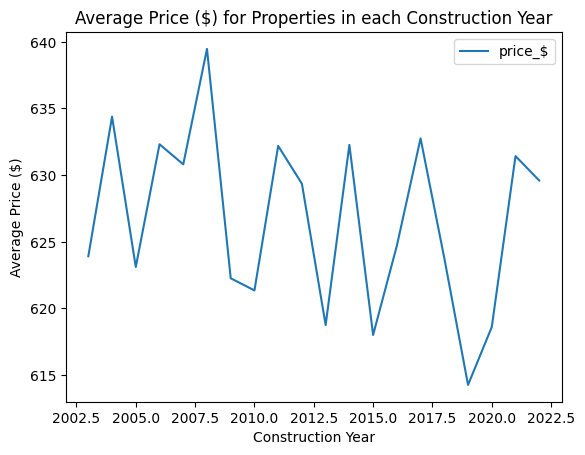

In [63]:
#Is there a relationship between the construction year of property and price?
df.groupby(df['Construction year'])['price_$'].mean().to_frame().plot();
plt.xlabel('Construction Year');
plt.ylabel('Average Price ($)');
plt.title('Average Price ($) for Properties in each Construction Year');

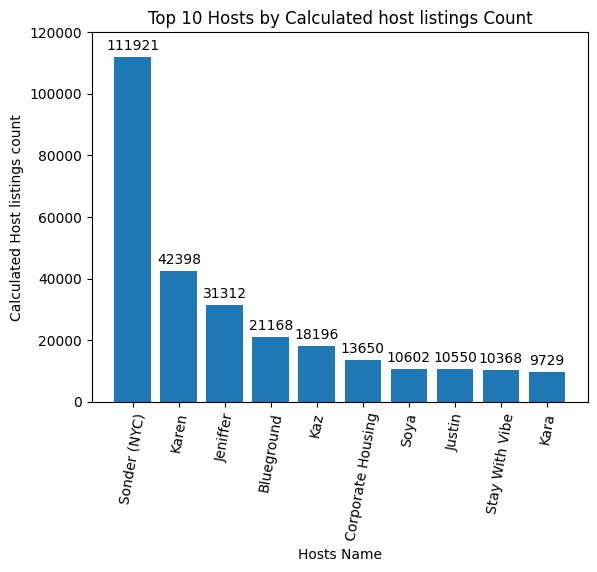

In [64]:
#Who are the top 10 hosts by calculated host listing count?
hosts = df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending = False).nlargest(10).to_frame()
hosts_bar = plt.bar(hosts.index, hosts.loc[:,'calculated host listings count']);
plt.bar_label(hosts_bar, label = hosts.loc[:,'calculated host listings count'], label_type = 'edge', padding = 3);
plt.xlabel('Hosts Name');
plt.ylabel('Calculated Host listings count');
plt.xticks(rotation = 80);
plt.ylim([0, 120000]);
plt.title('Top 10 Hosts by Calculated host listings Count');

In [65]:
#Are hosts with verified identities more likely to receive positive reviews?
review = df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending = False).to_frame()
review

,review rate number
host_identity_verified,
verified,3.290936
unconfirmed,3.283489


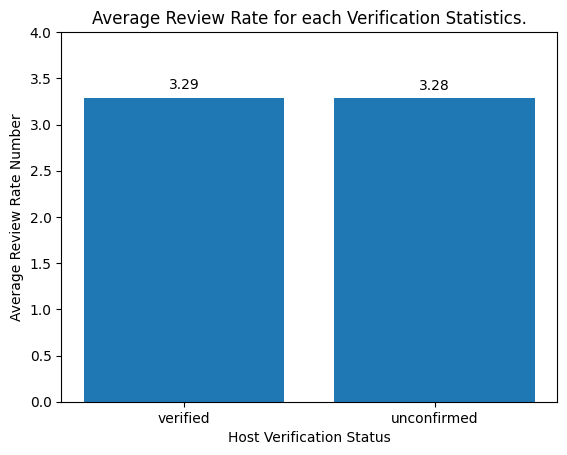

In [66]:
review_bar = plt.bar(review.index, review.loc[:,"review rate number"]);
plt.bar_label(review_bar, labels = round(review.loc[:,"review rate number"], 2), padding = 4);
plt.ylim([0,4]);
plt.xlabel('Host Verification Status');
plt.ylabel('Average Review Rate Number');
plt.title('Average Review Rate for each Verification Statistics.');

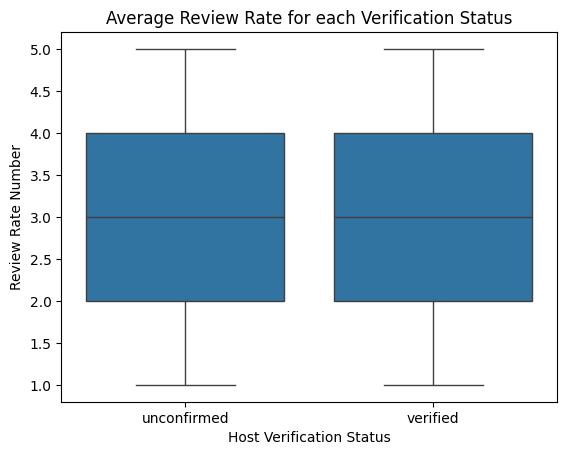

In [67]:
base_color = sns.color_palette()[0]
sns.boxplot(data = df, x = "host_identity_verified", y = "review rate number", color = base_color);
plt.xlabel('Host Verification Status');
plt.ylabel('Review Rate Number');
plt.title('Average Review Rate for each Verification Status');

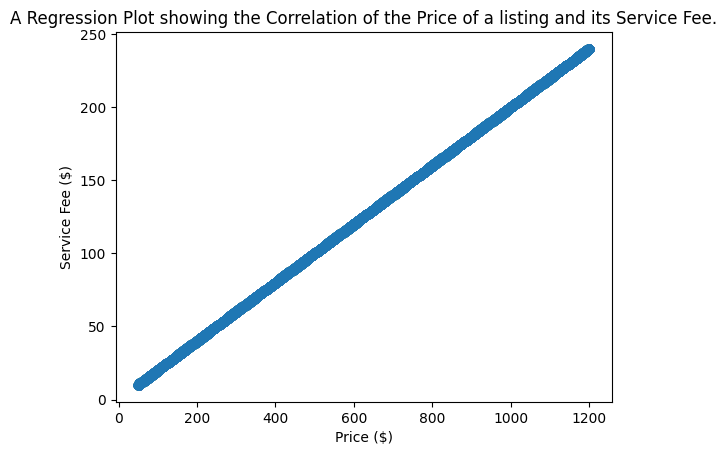

In [68]:
#Is there a correlation between the price of a listing and its service fee?
df['price_$'].corr(df['service_fee_$'])

# [Output: 0.99991054957653]

sns.regplot(df, x = 'price_$', y = 'service_fee_$');
plt.xlabel('Price ($)');
plt.ylabel('Service Fee ($)');
plt.title('A Regression Plot showing the Correlation of the Price of a listing and its Service Fee.');

In [69]:
#What is the average review rate number (e.g., stars) for listings, and does it vary based on the neighborhood group and room type?
ARRN = df.groupby(['neighbourhood group', 'room type'])['review rate number'].mean().to_frame()
ARRN

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.376443
                    Private room               3.326220
                    Shared room                3.359551
Brooklyn            Entire home/apt            3.253158
                    Hotel room                 3.714286
                    Private room               3.284278
                    Shared room                3.329470
Manhattan           Entire home/apt            3.275499
                    Hotel room                 3.500000
                    Private room               3.294045
                    Shared room                3.264036
Queens              Entire home/apt            3.355994
                    Hotel room                 3.750000
                    Private room               3.318775
                    Shared room                3.330935
Staten Island       Entire home/apt            3.327711
                    Private room               3.489848
                    Shared room                3.714286
brookln             Private room               4.000000

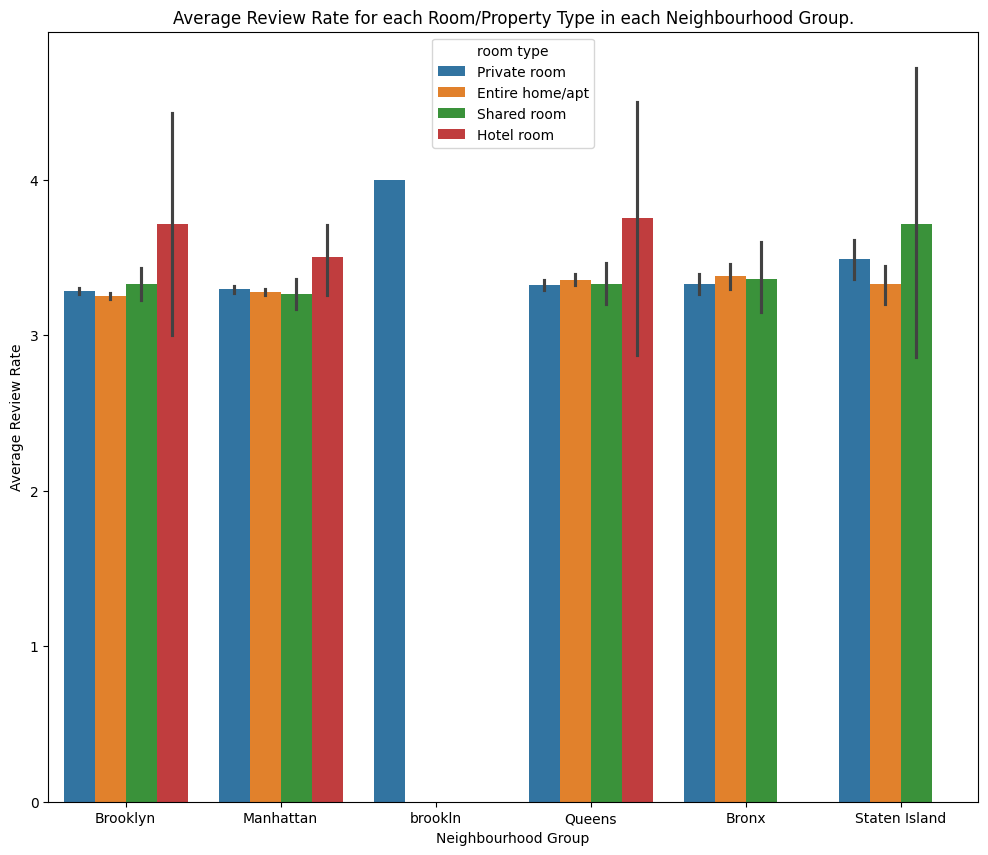

In [70]:
plt.figure(figsize = [12,10]);
sns.barplot(data = df, x = 'neighbourhood group', y = 'review rate number', hue = 'room type');
plt.xlabel('Neighbourhood Group');
plt.ylabel('Average Review Rate');
plt.title('Average Review Rate for each Room/Property Type in each Neighbourhood Group.');

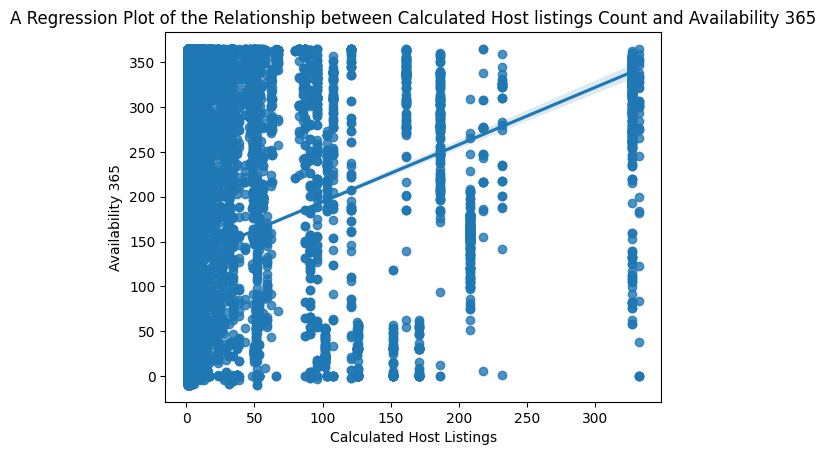

In [71]:
#Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?
sns.regplot(df, x = 'calculated host listings count', y = 'availability 365');
plt.xlabel('Calculated Host Listings');
plt.ylabel('Availability 365');
plt.title('A Regression Plot of the Relationship between Calculated Host listings Count and Availability 365');

In [72]:
df['calculated host listings count'].corr(df['availability 365'])


np.float64(0.1481029119496775)


Conclusion

In conclusion, this project has provided a comprehensive analysis of the New York City Airbnb dataset, shedding light on various aspects of the short-term lodging market. Through data wrangling, exploratory data analysis (EDA), and interpretation of summary statistics, we've uncovered valuable insights into listing distribution, pricing dynamics, host, and review analysis.

Key findings include the dominance in counts of Entire home/apt listings, the variability in listing counts across neighborhood groups, and the downward trend between property construction year and price. Additionally, the analysis highlighted the significance of verified host status on review rates, as well as the strong correlation between listing price and service fee.

Furthermore, conducting sentiment analysis on guest reviews to understand factors driving customer satisfaction and preferences could inform targeted marketing strategies and product improvements for Airbnb. Lastly, expanding the analysis to include predictive modeling techniques, such as regression or machine learning algorithms, could enable forecasting of listing demand, pricing trends, and customer behavior, facilitating strategic decision-making for stakeholders in the short-term lodging industry.